# A Brief Data Science Pipeline

#### [Institute of Data Science at Maastricht University](https://www.maastrichtuniversity.nl/research/institute-data-science)

![](../img/pipeline-general.png)

## Introduction

[[ go back to the top ]](#Table-of-contents)

In the time it took you to read this sentence, terabytes of data have been collectively generated across the world — more data than any of us could ever hope to process, much less make sense of, on the machines we're using to read this notebook.

In response to this massive influx of data, the field of Data Science has come to the forefront in the past decade. Cobbled together by people from a diverse array of fields — statistics, physics, computer science, design, and many more — the field of Data Science represents our collective desire to understand and harness the abundance of data around us to build a better world.

In this notebook, I'm going to go over a basic Python data analysis pipeline from start to finish to show you what a typical data science workflow looks like.

In addition to providing code examples, I also hope to imbue in you a sense of good practices so you can be a more effective — and more collaborative — data scientist.

I will be following along with the data analysis checklist from [The Elements of Data Analytic Style](https://leanpub.com/datastyle), which I strongly recommend reading as a free and quick guidebook to performing outstanding data analysis.


![](../img/pipeline-matrix.png)

In [4]:
import pandas as pd

df_participants = pd.read_csv('participants.csv', sep=',')
df_participants.head()

,id,gender,age,height_cm,weight_kg,pineapple_pizza
0,1,Female,89,148,52,True
1,2,Male,43,522,344,True
2,3,Male,34,809,230,False
3,4,Female,70,739,242,True
4,5,Female,72,799,814,False


Since the data was previously wrangled then is ready to use
We have to remember that the columns represent our features, or survey questions

Next, it's always a good idea to look at the distribution of our data — especially the outliers.
Let's start by printing out some summary statistics about the data set.

In [5]:
df_participants.describe()

,id,age,height_cm,weight_kg
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,57.400000,631.950000,439.350000
std,5.91608,23.926202,249.706243,280.634483
min,1.00000,7.000000,91.000000,20.000000
25%,5.75000,41.000000,510.250000,217.500000
50%,10.50000,64.500000,702.500000,449.000000
75%,15.25000,73.250000,801.500000,621.000000
max,20.00000,93.000000,970.000000,876.000000


The function describe only shows the continous variables

Since we know we're going to be plotting in this section, let's set up the notebook so we can plot inside of it.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Next, let's create a **scatterplot matrix**. Scatterplot matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.

We can even have the plotting package color each entry by its class to look for trends within the classes.

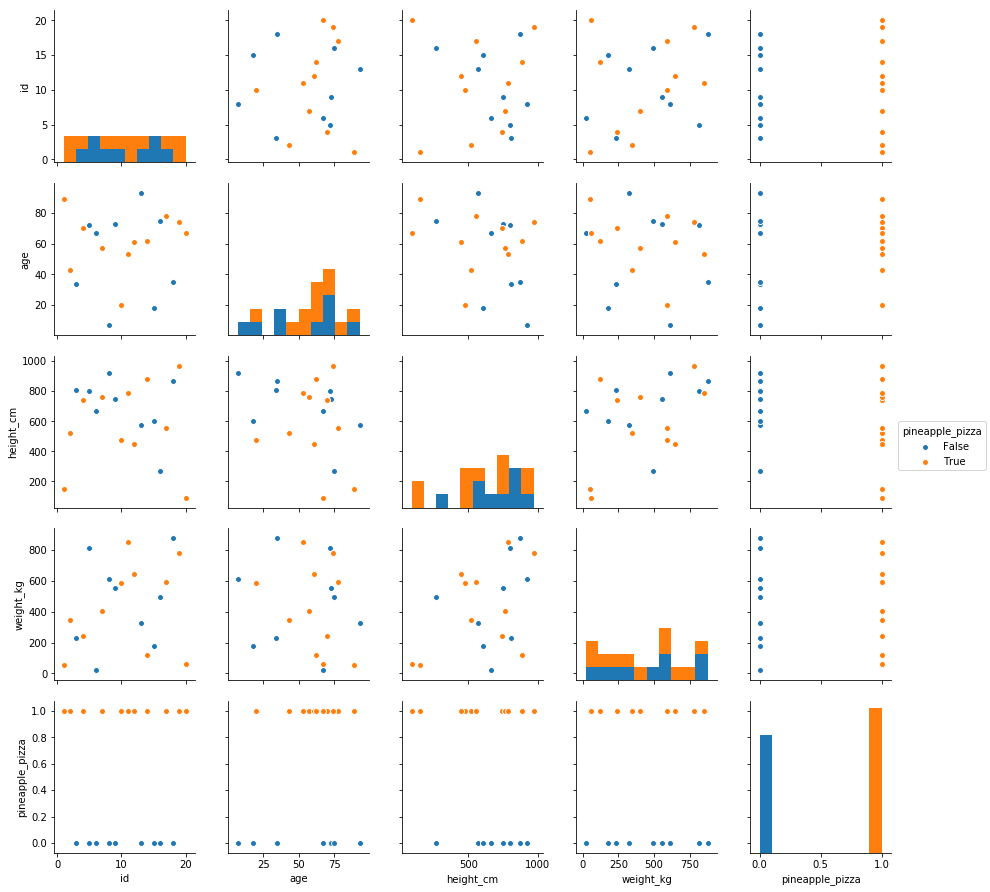

In [8]:
sns.pairplot(df_participants.dropna(), hue='pineapple_pizza')

From the scatterplot matrix, we can already see some issues with the data set:

In [11]:
df_participants_f = df_participants.loc[df_participants['gender'] == 'Female']
df_participants_m = df_participants.loc[df_participants['gender'] == 'Male']

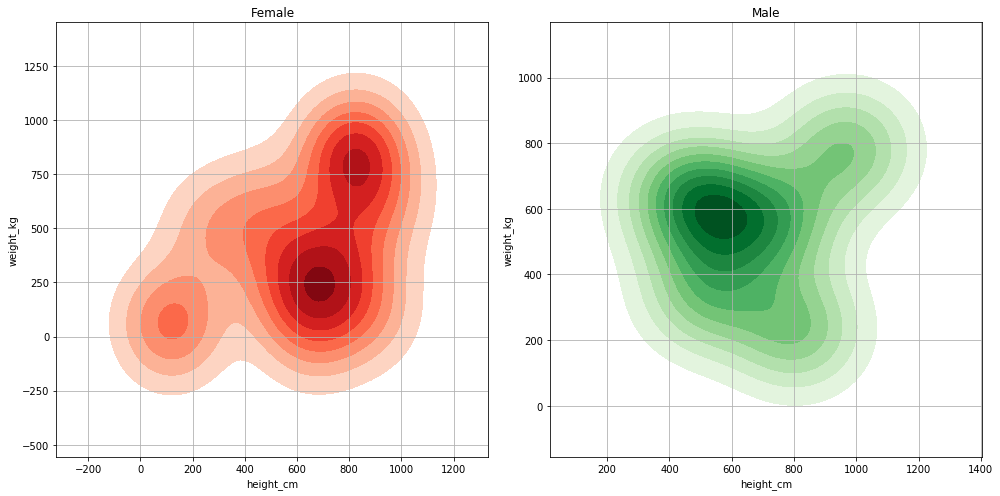

In [12]:
plt.figure(figsize=[14, 7])
plt.subplot(1,2,1); plt.grid()
sns.kdeplot(df_participants_f['height_cm'], df_participants_f['weight_kg'], cmap="Reds", shade=True, shade_lowest=False)
plt.title('Female')
plt.subplot(1,2,2); plt.grid()
sns.kdeplot(df_participants_m['height_cm'], df_participants_m['weight_kg'], cmap="Greens", shade=True, shade_lowest=False)
plt.title('Male')
plt.tight_layout()

Enough flirting with the data. Let's get to modeling.

## Classification

Wow, all this work and we *still* haven't modeled the data!

As tiresome as it can be, tidying and exploring our data is a vital component to any data analysis. If we had jumped straight to the modeling step, we would have created a faulty classification model.

Remember: **Bad data leads to bad models.** Always check your data first.

A **training set** is a random subset of the data that we use to train our models.

A **testing set** is a random subset of the data (mutually exclusive from the training set) that we use to validate our models on unforseen data.

Especially in sparse data sets like ours, it's easy for models to **overfit** the data: The model will learn the training set so well that it won't be able to handle most of the cases it's never seen before. This is why it's important for us to build the model with the training set, but score it with the testing set.

Note that once we split the data into a training and testing set, we should treat the testing set like it no longer exists: We cannot use any information from the testing set to build our model or else we're cheating.

Let's set up our data first.

In [13]:
# We can extract the data in this format from pandas like this:
all_inputs = df_surveys[['age', 'height_cm','weight_kg']].values

# Similarly, we can extract the classes
all_classes = df_participants['pineapple_pizza'].values

# Here's what a subset of our inputs looks like:
all_inputs[:5]

array([[ 89, 148,  52],
       [ 43, 522, 344],
       [ 34, 809, 230],
       [ 70, 739, 242],
       [ 72, 799, 814]])

Now our data is ready to be split.

In [19]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_classes, test_size=0.33,random_state=4)

In [24]:
# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print(metrics.classification_report(y_test, clf.predict(X_test)))
print('Accuracy: {}'.format(round(clf.score(X_test, y_test),2)))

             precision    recall  f1-score   support

      False       0.14      1.00      0.25         1
       True       0.00      0.00      0.00         6

avg / total       0.02      0.14      0.04         7

Accuracy: 0.14


/Users/pedrohserrano/anaconda3/envs/py35r/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)
print(metrics.classification_report(y_test, clf2.predict(X_test)))
print('Accuracy: {}'.format(round(clf.score(X_test, y_test),2)))

             precision    recall  f1-score   support

      False       0.00      0.00      0.00         1
       True       0.00      0.00      0.00         6

avg / total       0.00      0.00      0.00         7

Accuracy: 0.14


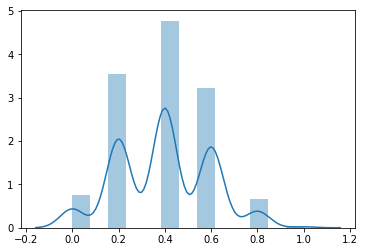

In [26]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
sns.distplot(model_accuracies)

## Reproducibility

Ensuring that our work is reproducible is the last and — arguably — most important step in any analysis. **As a rule, we shouldn't place much weight on a discovery that can't be reproduced**. As such, if our analysis isn't reproducible, we might as well not have done it.

Notebooks like this one go a long way toward making our work reproducible. Since we documented every step as we moved along, we have a written record of what we did and why we did it — both in text and code.